In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
pi1Mass = 0.13957018
k1Mass = 0.493677
mass1, mass2 = 0, 0

date = "OCT27"
channel = "d0starrho"
mesonCat = ""
mesonNum = 0
if (channel == "omega"):
    mesonCat = "OmegaCat"
    mesonNum = 1038
    mass1, mass2 = pi1Mass, pi1Mass
elif (channel == "phi"):
    mesonCat = "Phi3Cat"
    mesonNum = 1039
    mass1, mass2 = pi1Mass, pi1Mass
elif (channel == "d0starrho"):
    mesonCat = "D0StarRhoCat"
    mesonNum = 1040
    mass1, mass2 = pi1Mass, k1Mass
elif (channel == "d0star"):
    mesonCat = "D0StarCat"
    mesonNum = 1041
    mass1, mass2 = pi1Mass, k1Mass
else:
    raise Exception("Wrong channel.")

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc{1}_GFcat_{2}_2018.root".format(date, mesonNum, mesonCat))

dfSGN = ROOT.RDataFrame(chainSGN)
dfSGN = (dfSGN.Define("scale", "w*lumiIntegrated"))

dfSGN = (dfSGN.Define("newDitrackMass", "sum2Body(goodMeson_trk1_pt[0], goodMeson_trk1_eta[0], goodMeson_trk1_phi[0], {}, goodMeson_trk2_pt[0], goodMeson_trk2_eta[0], goodMeson_trk2_phi[0], {}).M()".format(mass1, mass2))
                .Define("DiffFittedMass", "goodMeson_ditrk_mass - goodMeson_ditrk_mass_GEN")
                .Define("DiffSumMass", "newDitrackMass - goodMeson_ditrk_mass_GEN"))

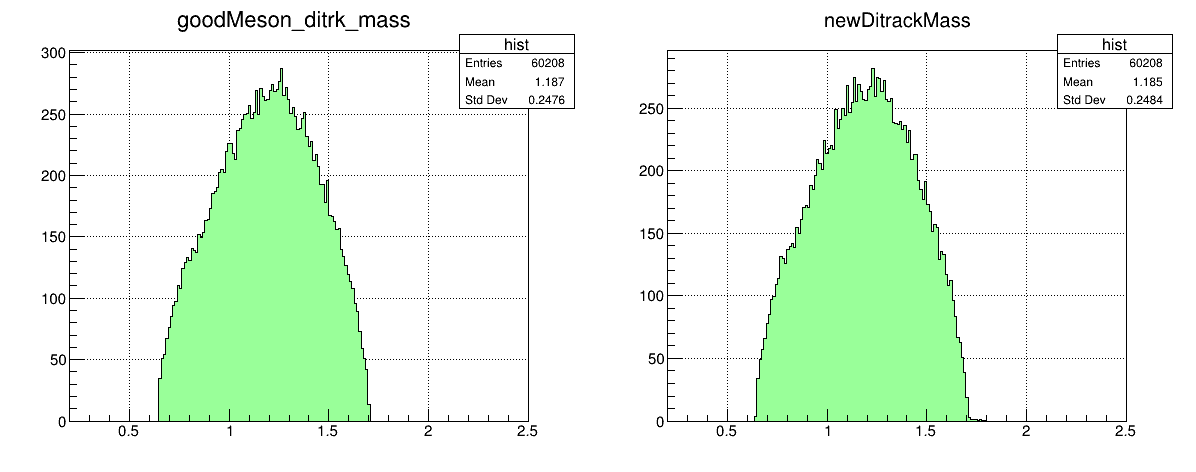

In [3]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 500)
canvas.Divide(2, 1)

nbins, xlow, xhigh = 200, 0.2, 2.5

p = canvas.cd(1)
hFittedMass = dfSGN.Histo1D(("hist", "goodMeson_ditrk_mass", nbins, xlow, xhigh), "goodMeson_ditrk_mass", "scale")
hFittedMass.SetFillColor(ROOT.kGreen-9)
hFittedMass.SetLineColor(ROOT.kBlack)
hFittedMass.Draw("hist")
p.SetGrid()

p = canvas.cd(2)
hSumMass = dfSGN.Histo1D(("hist", "newDitrackMass", nbins, xlow, xhigh), "newDitrackMass", "scale")
hSumMass.SetFillColor(ROOT.kGreen-9)
hSumMass.SetLineColor(ROOT.kBlack)
hSumMass.Draw("hist")
p.SetGrid()

canvas.Draw()

MASS STD SUM:	 0.04246485862557704
MASS STD FIT :	 0.0308396551021583 -0.2737605610775955


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


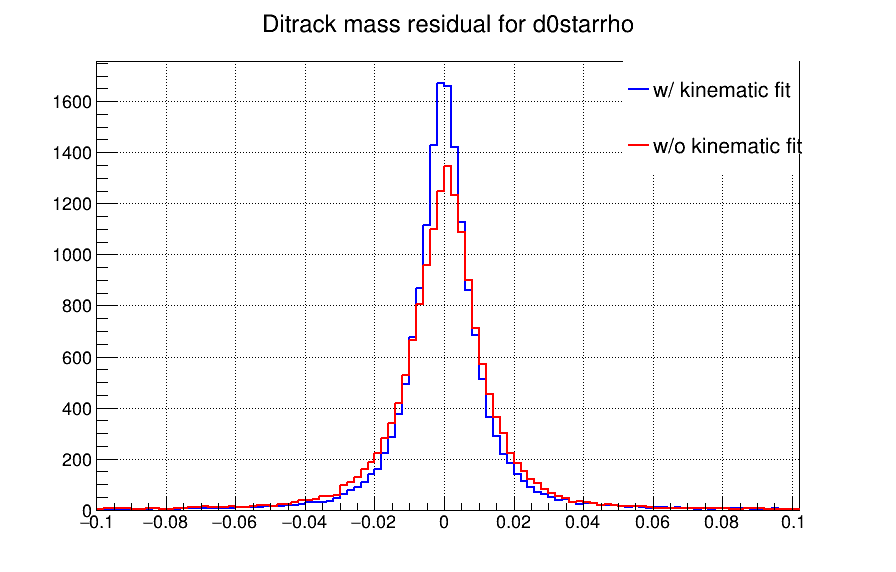

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 900, 600)
canvas.Divide(1, 1)

nbins, xlow, xhigh = 500, -0.5, 0.5
#nbins, xlow, xhigh = 100, -0.1, 0.1
p = canvas.cd(1)
hFittedMass = dfSGN.Histo1D(("hist", "DiffFittedMass", nbins, xlow, xhigh), "DiffFittedMass", "scale").GetValue()
hFittedMass.SetLineWidth(2)
hFittedMass.SetLineColor(ROOT.kBlue)

#hFittedMass.Draw("hist")

hSumMass = dfSGN.Histo1D(("hist", "DiffSumMass", nbins, xlow, xhigh), "DiffSumMass", "scale").GetValue()
hSumMass.SetLineWidth(2)
hSumMass.SetLineColor(ROOT.kRed)
#hSumMass.Draw("hist")

stack4 = ROOT.THStack("stack", "Ditrack mass residual for {}".format(channel))
stack4.Add(hFittedMass)
stack4.Add(hSumMass)
stack4.Draw("hist nostack")
stack4.GetXaxis().SetRangeUser(-0.1, 0.1)
legend4 = ROOT.TLegend(0.70, 0.70, 0.9, 0.9)
legend4.SetMargin(0.17)
legend4.SetBorderSize(0)
legend4.SetTextSize(0.04)
legend4.AddEntry(hFittedMass, "w/ kinematic fit", "l")
legend4.AddEntry(hSumMass, "w/o kinematic fit", "l")
legend4.Draw()

p.SetGrid()

canvas.Draw()

print("MASS STD SUM:\t", hSumMass.GetStdDev())
print("MASS STD FIT :\t", hFittedMass.GetStdDev(), hFittedMass.GetStdDev()/hSumMass.GetStdDev()-1)